# Mission 2. Abengers, Assemble!

Bicsubi를 다 만들고 보니 사이렌이 울렸다. 국제보안기구 <U.B.U.N.T.U>에게서 긴급 이메일이 도착했다. 죄없는 컴퓨터들에게 무차별적인 Request를 통해 이상상태로 만드는 악당 <디도스>가 인터넷을 침략하려고 한다는 소식을 전했다. 이를 막기 위해 최정예부대인 우리는 Abengers (저작권을 조심합시다) 를 소집하기로 했다. 도와줘요 Abengers!

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Core Mission
* **다음 질문에 답하시오.**

**캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.**

In [360]:
stat_df = pd.read_csv('charcters_stats.csv')
stat_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [361]:
# 결측치 제거
stat_df = stat_df.dropna()
stat_df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [362]:
stat_df[stat_df['Total']==max(stat_df.Total)]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


In [363]:
# Total Column 하나로 바로 답을 도출하는 건 너무.. 꾀를 부리는 것 같아서 없애고도 해봤습니다...

stat_df_without_Total = stat_df.drop(['Total'],axis=1)
stat_df_without_Total.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,3-D Man,good,50,31,43,32,25,52
1,A-Bomb,good,38,100,17,80,17,64
2,Abe Sapien,good,88,14,35,42,35,85
3,Abin Sur,good,50,90,53,64,84,65
4,Abomination,bad,63,80,53,90,55,95


In [364]:
stat_df_without_Total[stat_df_without_Total.sum(axis=1)==max(stat_df_without_Total.sum(axis=1))]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
361,Martian Manhunter,good,100,100,96,100,100,85


### "Martian Manhunter" 캐릭터가 수치의 합이 가장 크다는 사실을 깨달았다.

**좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.**

In [365]:
stat_mean = stat_df_without_Total.groupby(by=stat_df['Alignment']).mean()
stat_mean

,Intelligence,Strength,Speed,Durability,Power,Combat
Alignment,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364


In [366]:
# 육각형 그래프 그리기
# 참고 : https://pbj0812.tistory.com/360

def sqrt(inp):
    result = inp/2
    for i in range(30):
        result = (result + (inp / result)) / 2
    return result

In [367]:
def honeycomb_list(inp):
    result_x = []
    result_y = []
    for i in range(6):
        theta = (2 * np.pi / 6) * (i + 1) - (2 * np.pi / 6) / 2
        result_x.append(inp[i] * np.cos(theta))
        result_y.append(inp[i] * np.sin(theta))
    theta = (2 * np.pi / 6) * (0 + 1) - (2 * np.pi / 6) / 2
    result_x.append(inp[0] * np.cos(theta))
    result_y.append(inp[0] * np.sin(theta))    
    return result_x, result_y

In [368]:
def honeycomb_graph(inp1, inp2, title):
    max_list = np.zeros(6) + inp1
    max_x, max_y = honeycomb_list(max_list)
    x, y = honeycomb_list(inp2)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.patch.set_visible(False)
    ax.axis('off')
    # 바깥쪽 그래프
    plt.plot(max_x, max_y, 'b')
    # 안쪽 그래프
    plt.plot(x, y, 'r')
    # 색 채우기
    plt.fill_between(x, y, 0, facecolor="red", alpha=0.2)
    # 점수쓰기
    score_list = np.array(inp2) + 1
    score_x, score_y = honeycomb_list(score_list)
    # 글자쓰기
    text = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
    text_x, text_y = honeycomb_list(max_list + 1)
    for i in range(6):
        # 점수 (반올림)
        plt.text(score_x[i], score_y[i], np.around(inp2[i]), fontsize = 18)
        # 점선
        plt.plot([0, max_x[i]], [0, max_y[i]], linestyle = '--', color = 'gray')
        # 글자
        plt.text(text_x[i], text_y[i], text[i], fontsize = 24)
    plt.title(title, fontsize=32)

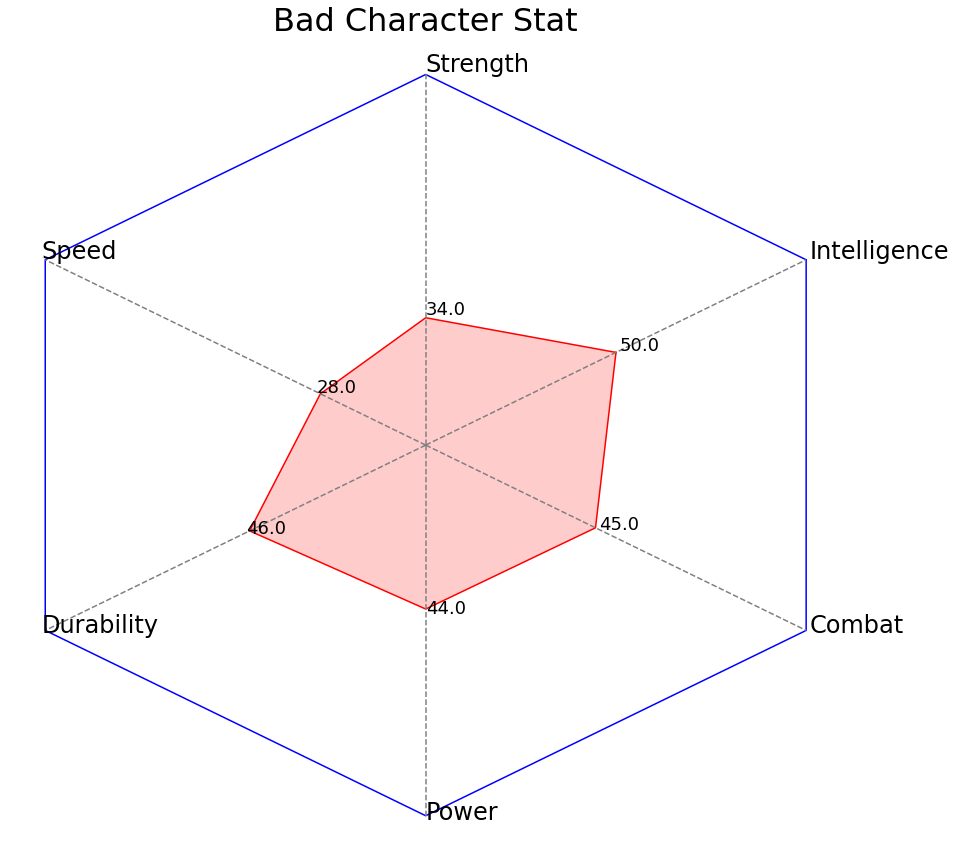

In [369]:
honeycomb_graph(100, list(stat_mean.iloc[0]), 'Bad Character Stat')

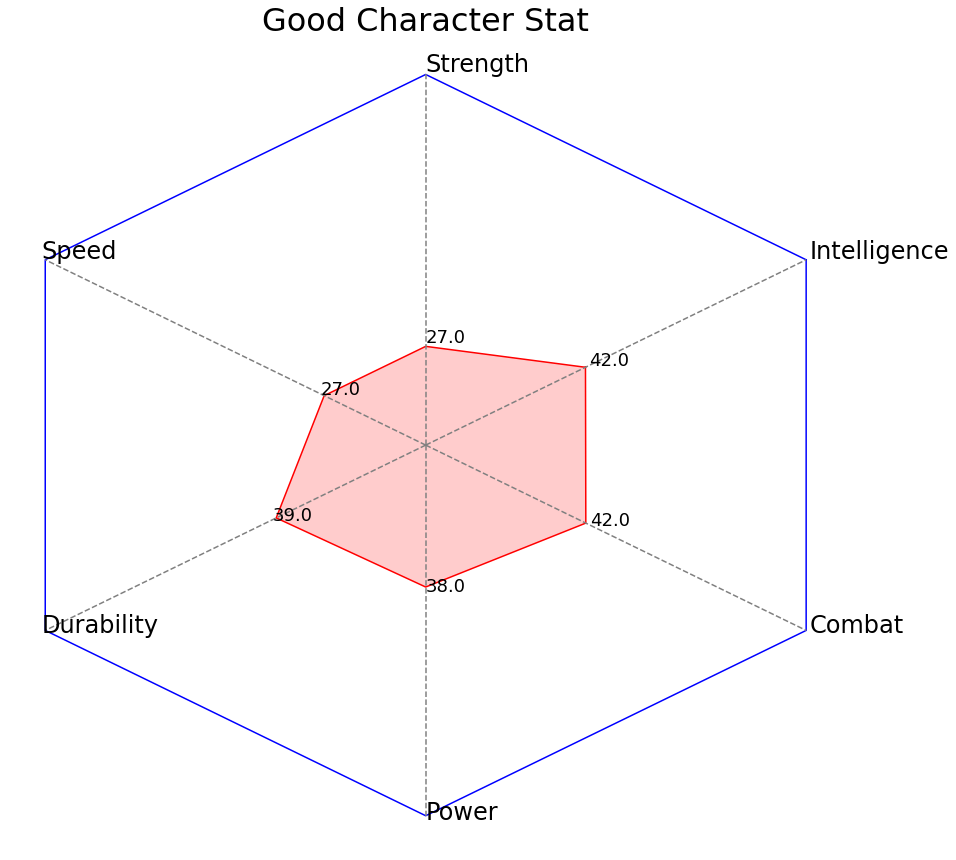

In [370]:
honeycomb_graph(100, list(stat_mean.iloc[1]), 'Good Character Stat')

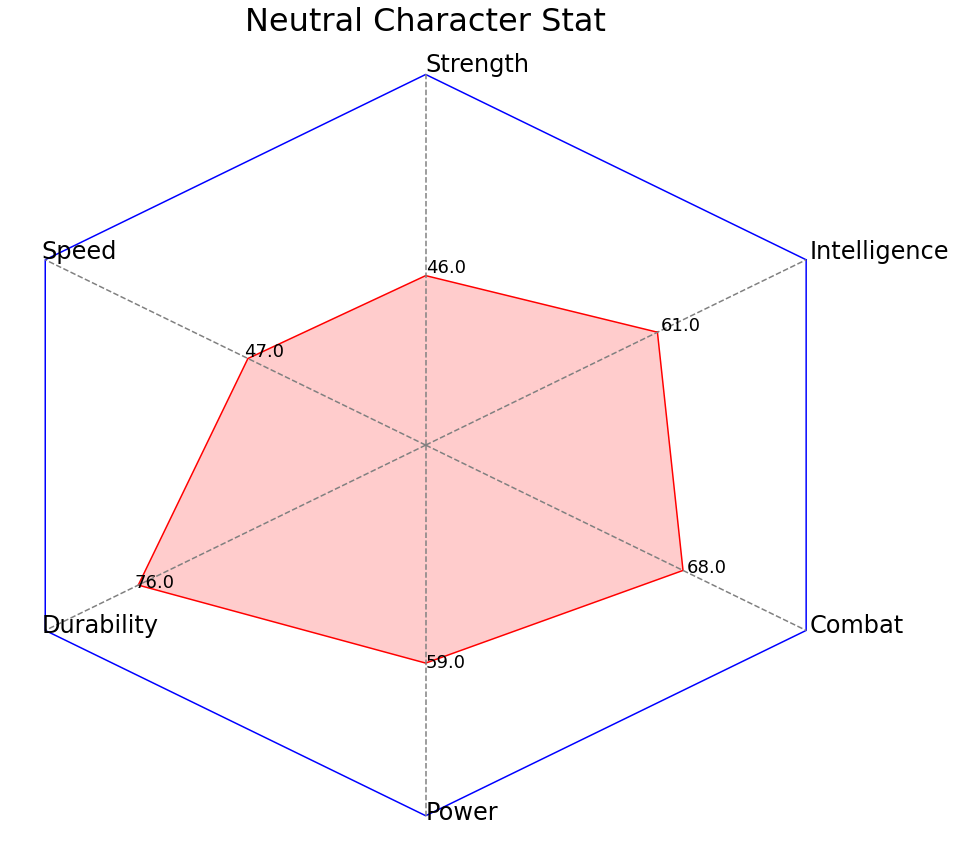

In [371]:
honeycomb_graph(100, list(stat_mean.iloc[2]), 'Neutral Character Stat')

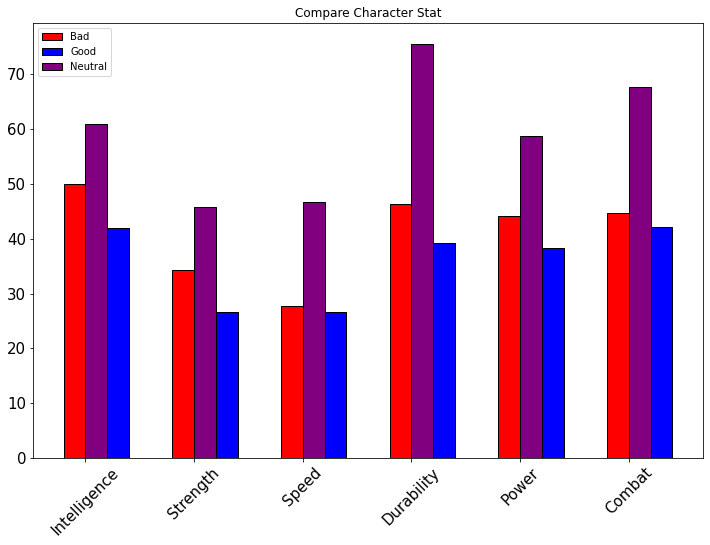

In [374]:
# bar plot으로 한 눈에 차이를 비교해보자.
stat_mean.reset_index(inplace=True)

plt.figure(figsize=(12,8))

p1=plt.bar(x=['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], height=list(stat_mean.iloc[0][1:]), alpha=1, align='edge', width=-.2, ec='k', color='red')
p2=plt.bar(x=['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], height=list(stat_mean.iloc[1][1:]), alpha=1, align='edge', width=.4, ec='k', color='blue')
p3=plt.bar(x=['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'], height=list(stat_mean.iloc[2][1:]), alpha=1, align='edge', width=.2, ec='k', color='purple')
plt.legend((p1[0], p2[0], p3[0]),('Bad','Good','Neutral'), fontsize=10, loc='upper left')

plt.title("Compare Character Stat")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

plt.show()

### 의외로 악역이 선역보다 더 좋은 능력치 평균을 지니고 있음을 깨달았다.